Group member: Meichen Huo, Diemeng Chen, Lan Yu, Yuyang Feng

Econ 570 Final Project

Prof: Ida Johnsson

05/06/2022

#  Introduction

## 1. Questions

Our mission in this project is that we are going to adopt three meachine learning models to find the best model for Indian House Price Prediction, and explore the correlation between every variables contained in the dataset.

## 2. Background

In India, the real estate sector is the second-highest source of employment after the agriculture sector in the industries and expected to account for 13% of India's GDP by 2025, according to NITI Aayog. Real estate used to be a shining industry in the Indian economy, but it had maintained low growth before COVID-19 and was in a downturn throughout the pandemic. Compared to other property market, average house prices increased very low with only 2.5% last year, according to Reuters calculations based on the Reserve Bank of India's House Price Index.

But the housing market is expected to accelerate as Asia's third-largest economy gets back on track and robust demand for property continues to expand. Whether or not to accurately predict housing prices is crucial.

The significance of selecting house price as the research subject is that the housing sector information is mainly reflected in the house price, which has a favorable impact on the macro-economy through the effective prediction of the house price. The housing sector can have a huge impact on the buyers and sellers and the whole society, therefore predicting the house price trending efficient manner, can help us to minimize the risk of loss, maximize profit and maintain public confidence in steady economic growth.

There are several policies related to the house price which have impact on the model in this paper. Firstly, construction, which has traditionally been a major employment generator for the largely unskilled labour force in India, received a special allocation in the February budget. Secondly, FDI in the sector (including construction development & activities) stood at US \\$ 52.48 billion between April 2000 to December 2021. Moreover, In the first-half of 2021, India registered investments worth US $ 2.4 billion into real estate assets, a growth of 52% YoY. Driven by increasing transparency and returns, more private market investors are seeking for an additional investment. For the time being, monetary policy is also helping. The Reserve Bank of India held on to its accommodative stance at its February meeting for the 11th consecutive meeting and kept its repo rate at a record low of 4.00%.

This paper will utilize the linear regression model, decision tree and random forest to help model the historical data of Indian house prices, and use these three models to accurately predict the future trend of Indian house prices based on various parameters.


## 3. Literature Review

Anirudh Kaushal, Achyut Shankar (2021) selects the multiple linear regression model with the highest accuracy for prediction from many machine learning models, such as Lasso, LassosoCV, Ridge, RidgeCV, and decision tree regressor, under the accuracy comparison of multiple models. The results show that the multiple linear regression model is suitable for the prediction of house prices.

M. Thamarai and S P. Malarvizhi (2022) uses decision tree classification, decision tree regression and multiple linear regression to build the models and is implemented using Scikit-Learn Machine Learning Tool. This work can help users predict the availability of homes in cities and also the prices of homes. Two algorithms, decision tree regression and multiple linear regression, were used to predict house prices. In contrast, multiple linear regression outperforms decision tree regression in house price prediction.

Adetunji and Akande et.al (2022) employed algorithm forest model for Boston house price prediction. Random forest has higher predictive accuracy than a single decision tree, because Random forest is an algorithm to average the outcomes of multiple decision trees. Form the result, the error margin between predicted and actual prices is narrowed in ±5 when the model performs well for the dataset.  



In [141]:
# !pip install seaborn
# !conda install basemap
# !pip install tabulate
# ! pip install wandb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz as gr
from tabulate import tabulate

# Data

## 1. Describe Data
We collected our data from Kaggle - "the house price in India". In order to appropriately testing our models, we used the train dataset from the original data. And we splited this dataset into training and testing groups to better build our models. Besides, we adjusted some variables to make our dataset more handy and informative. That is we changed **POSTED_BY** and **BHK_OR_RK** into categorical variables and separated **ADDRESS** into **CITY** and **LOCATION**, and then transformed into continues variables.

In [142]:
# The dataframe contains 11 columns
data = pd.read_csv("/Users/chendiemeng/Downloads/archive/train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [143]:
table = [['Variable Name', 'Description',], 
['UNDER_CONSTRUCTION', 'Category marking who has listed the property'], 
['RERA', 'Real estate regulatory authority approved or not'], 
['BHK_NO', 'Number of Rooms'], 
['BHK_OR_RK', 'Type of property'], 
['SQUARE_FT', 'Total area of the house in square feet'],
['READY_TO_MOVE', 'Category marking Ready to move or Not'],
['RESALE', 'Category marking Resale or not'],
['ADDRESS','ADDRESS'],
['LONGITUDE','Longitude of the property'],
['LATITUDE','Latitude of the property']]
print(tabulate(table))

------------------  ------------------------------------------------
Variable Name       Description
UNDER_CONSTRUCTION  Category marking who has listed the property
RERA                Real estate regulatory authority approved or not
BHK_NO              Number of Rooms
BHK_OR_RK           Type of property
SQUARE_FT           Total area of the house in square feet
READY_TO_MOVE       Category marking Ready to move or Not
RESALE              Category marking Resale or not
ADDRESS             ADDRESS
LONGITUDE           Longitude of the property
LATITUDE            Latitude of the property
------------------  ------------------------------------------------


## 2. Data Processing

### 2.1 Split data into train and test

In [144]:
from sklearn.model_selection import train_test_split
df_train = pd.read_csv("/Users/chendiemeng/Downloads/archive/train.csv")
display(df_train)
df_train = df_train[df_train['SQUARE_FT'] < 10000]
df_train = df_train[(df_train['LATITUDE'] <= 110) & (df_train['LATITUDE'] >= 50)]
df_train = df_train[(df_train['LONGITUDE'] <= 50) & (df_train['LONGITUDE'] >= 0)]
df_test = pd.read_csv("/Users/chendiemeng/Downloads/archive/test.csv")
from sklearn.preprocessing import LabelEncoder
def process_df(df):
    enc = LabelEncoder()
    df['BHK_OR_RK'] = enc.fit_transform(df['BHK_OR_RK'])
    df['POSTED_BY'] = enc.fit_transform(df['POSTED_BY'])
    df['SQUARE_FT'] = np.round(df['SQUARE_FT'],2)
    city_col = []
    loc_col = []
    for address in df['ADDRESS']:
        split = address.split(',')
        loc_col.append(split[0])
        city_col.append(split[-1])
    df['City'] = enc.fit_transform(city_col)
    df['Location'] = enc.fit_transform(loc_col)
    df.drop('ADDRESS',axis=1,inplace=True)
    X = df.drop('TARGET(PRICE_IN_LACS)',axis=1)
    return X 
 
y_train = df_train['TARGET(PRICE_IN_LACS)']
X_train = process_df(df_train) 
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

# original data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [145]:
X_train # processed data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,City,Location
16560,2,0,0,2,0,1074.38,1,1,27.224363,79.033720,167,4915
25052,1,0,0,2,0,1250.00,1,1,30.707127,76.856318,181,2530
12026,1,1,1,3,0,873.17,0,0,19.038205,73.066120,157,2252
4412,1,0,0,2,0,905.72,1,1,19.371618,72.824114,147,3572
25476,1,0,0,2,0,1000.00,1,1,13.011583,80.123114,49,2359
...,...,...,...,...,...,...,...,...,...,...,...,...
21898,1,0,1,2,0,1150.22,1,1,28.919600,76.897200,77,111
5459,2,0,0,3,0,1240.20,1,1,12.969910,77.597960,21,743
871,2,0,0,1,0,454.55,1,1,9.919660,78.119390,146,5128
16034,1,1,1,2,0,910.00,0,1,22.709351,75.900743,101,3557


### 2.2 correlation between TARGET and all variables

In [146]:
df_train = X_train.join(y_train)
df_train = df_train[df_train['TARGET(PRICE_IN_LACS)'] < 10000]
price_corr=df_train.corr()['TARGET(PRICE_IN_LACS)']
print(price_corr.sort_values())

POSTED_BY               -0.161505
LATITUDE                -0.136874
LONGITUDE               -0.068346
Location                -0.029364
UNDER_CONSTRUCTION      -0.015236
BHK_OR_RK               -0.009166
RESALE                   0.002836
READY_TO_MOVE            0.015236
RERA                     0.032554
City                     0.038228
BHK_NO.                  0.353162
SQUARE_FT                0.476833
TARGET(PRICE_IN_LACS)    1.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64


### 2.3 Visualization

<AxesSubplot:>

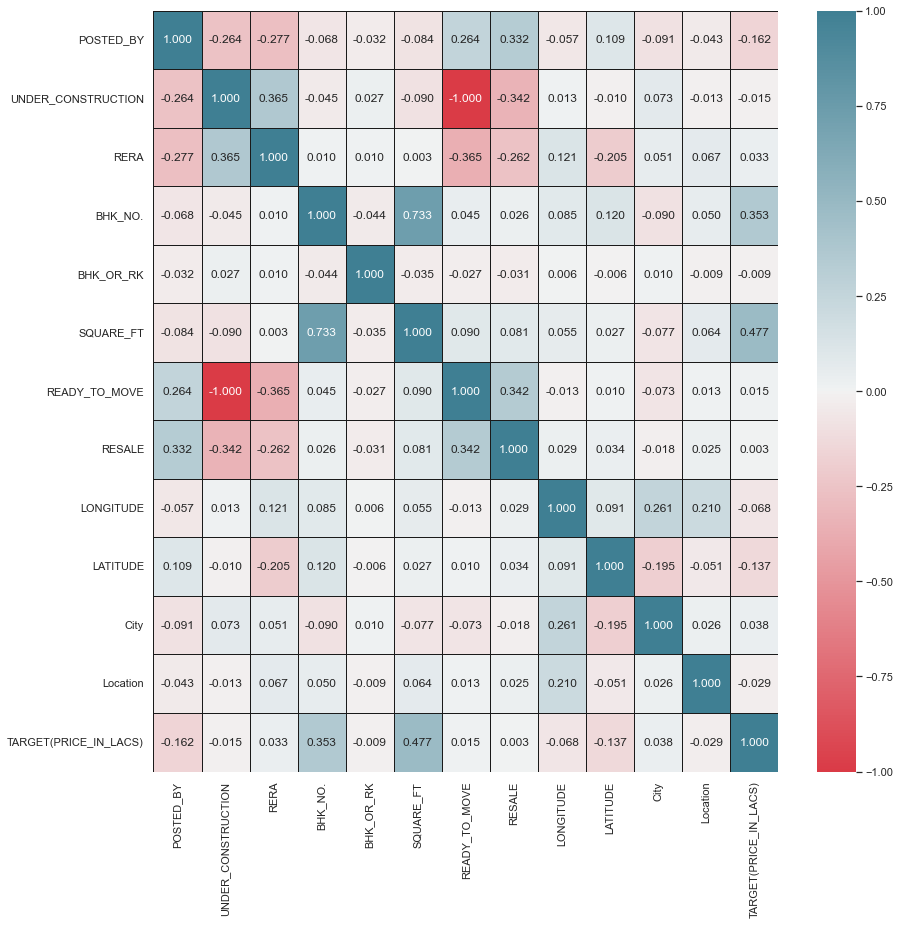

In [147]:
fig, ax = plt.subplots(figsize=(14, 14))

sns.heatmap(data=df_train.corr(),    
    vmin=-1.0, 
    vmax=1.0, 
    center=0,
    cmap = sns.diverging_palette(10, 220, as_cmap=True),
    annot = True,
    linewidths=0.5, 
    linecolor='k',
    fmt='.3f',
    ax = ax
    )

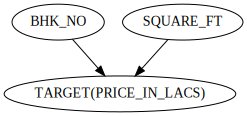

In [148]:
g = gr.Digraph()
g.edge("BHK_NO", "TARGET(PRICE_IN_LACS)")
g.edge("SQUARE_FT", "TARGET(PRICE_IN_LACS)")
g

### Significant Observations
According to the heatmap above, we observed that, firstly, **BHK_NO** and **SQUARE_FT** are positively correlated with **"TARGET(PRICE_IN_LACS)"**, which means the more rooms in the house, the higher price it has. In addition, **BHK_NO** and **SQUARE_FT** also correlate with each other.

Moreover, **"RERA"** has a negative relation with **"READY_TO_MOVE"**, and a positive relation with **"UNDER_CONSTRUCTION"**. That is because when the house is ready to move, it is unlikely approved by RERA. However, if the house is under construction, it is more likely to be approved. 

## 3. Data Exploration

In [149]:
sample_size = len(X_train)
print(f"Total number of samples in our dataset: {sample_size}")
print('-----------')
print(f"Average square feet of houses:{X_train['SQUARE_FT'].mean()}")
print(f"Standard deviation square feet of houses:{X_train['SQUARE_FT'].std()}")
print('-----------')
print(f"Average number of rooms: {X_train['BHK_NO.'].mean()}")
print(f"Standard deviation square feet of houses:{X_train['BHK_NO.'].std()}")
print('-----------')
print(f"Number of houses under construction:{X_train['UNDER_CONSTRUCTION'].sum()}")
print('-----------')
print(f"Real estate regulatory authrotiy approval rate: {X_train['RERA'].sum()/sample_size}")

Total number of samples in our dataset: 19443
-----------
Average square feet of houses:1311.495719281996
Standard deviation square feet of houses:740.5553724911111
-----------
Average number of rooms: 2.3908347477241167
Standard deviation square feet of houses:0.8545324059134439
-----------
Number of houses under construction:3524
-----------
Real estate regulatory authrotiy approval rate: 0.3188293987553361


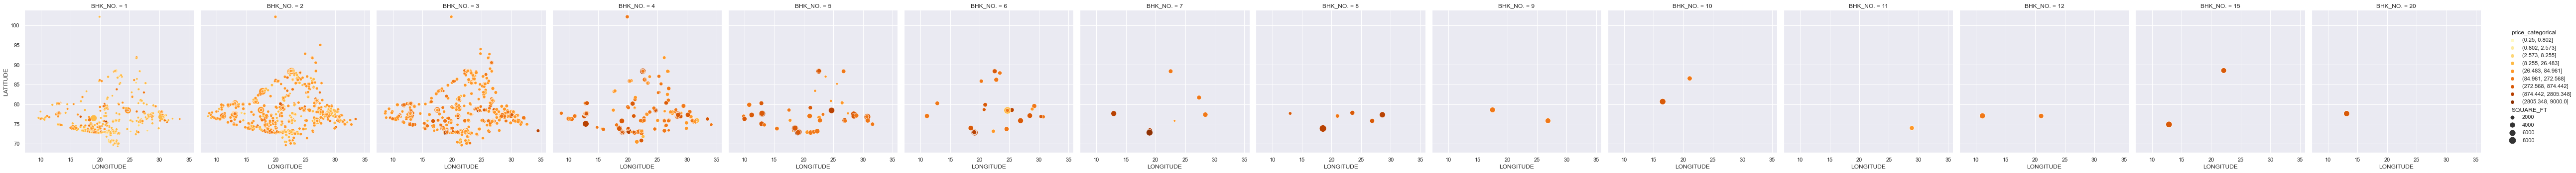

In [150]:
price_min = df_train['TARGET(PRICE_IN_LACS)'].min()
price_max = df_train['TARGET(PRICE_IN_LACS)'].max()
bins = np.geomspace(price_min,price_max,10)
df_train['price_categorical'] = pd.cut(df_train['TARGET(PRICE_IN_LACS)'],bins=bins)
# fig,ax = plt.subplots(figsize=(18,16))
sns.set(rc={'figure.figsize':(18,16)})
sns.relplot(data=df_train,
            x='LONGITUDE',
            y="LATITUDE",
            hue='price_categorical',
            size="SQUARE_FT", 
            sizes=(10, 200),
            col="BHK_NO.",
            palette='YlOrBr'
           )
plt.savefig('scatter_plot.png')

In [ ]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='stere',
            width=2.3E6, height=3E6,
            lat_0=20.5937, lon_0=78.9629,)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.etopo(scale=0.5, alpha=0.5)

lat = X_train['LONGITUDE']
lon = X_train['LATITUDE']
area = X_train['SQUARE_FT']
price = y_train
m.scatter(lon, lat, latlon=True,
          c=price, s=np.log(area),
          cmap='hsv', alpha=0.1)
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left')

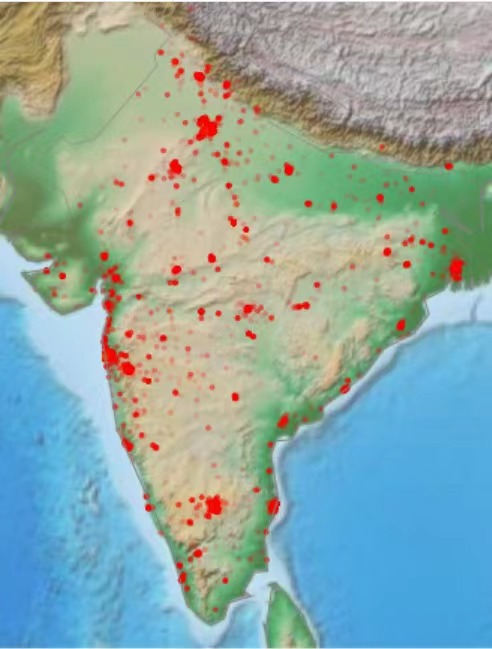

## Summary statistics 

The above figure demonstrates the distribution, size, and prices of houses with the respect to their locations. Each data point on the grid represents a single instance of house data, where its corresponding size and price is revealed from its color and ticker sizes. Here, a darker hue represents a more expensive price. Notice that our data is being subplotted via **"BHK_NO."** (i.e the number of bedrooms). We make the following observations:

### Trivial Observations (Sanity check):
    
    1. The average size (reflective of house sizes) of the sample dots is increasing as the attribute "BHK_NO." increases. This is intuitive since a house with more bedrooms is going have larger area in general.
    2. The prices of the houses is positively correlated with the number of bedrooms and its area.
    3. Our data is clustered within a big longitude and latitude range
    
### Concrete Observations:
    1. The prices of house does not demonstrate any clustering effects; that is, the prices ranges are relatively uniformly distributed with respect to the area on map. In simpler words, we don't see a "poor" city and a "rich" city. However, since our longitude and latitude range used is large, we might potentially observe the price clustering effect on a more localized plot.
    2. The houses with two bedrooms is the most population option in India (with the assumption that our dataset unbiasedly and accrately reflected the real-estate outlook in India)

# Modeling

We've built three models for house price prediction, which includes **Linear Regression Model**, **Decision Tree Model** and **Random Forest Model**. 

## 1. LinearRegresion
### 1) control for all covariates

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

ols_covar = LinearRegression().fit(X_train,y_train)
predicted = ols_covar.predict(X_test)
score = np.sqrt(mean_squared_error(y_test, predicted))
display(pd.Series({col:coef for col,coef in zip(X_train.columns, ols_covar.coef_)}))
print(f"Intercept:{ols_covar.intercept_}")
print(f"RMSE:{score}")

POSTED_BY            -41.655669
UNDER_CONSTRUCTION    -0.314971
RERA                  -4.695555
BHK_NO.               10.853637
BHK_OR_RK             28.714237
SQUARE_FT              0.112803
READY_TO_MOVE          0.314971
RESALE                 7.269046
LONGITUDE             -3.141384
LATITUDE              -5.545634
City                   0.203749
Location              -0.005910
dtype: float64

Intercept:467.0383324549777
RMSE:156.1770479118637


### 2) do not control the covariate SQUARE_FT and BHK_NO.

In [152]:
X_train.drop(['SQUARE_FT','BHK_NO.'],axis=1)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_OR_RK,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,City,Location
16560,2,0,0,0,1,1,27.224363,79.033720,167,4915
25052,1,0,0,0,1,1,30.707127,76.856318,181,2530
12026,1,1,1,0,0,0,19.038205,73.066120,157,2252
4412,1,0,0,0,1,1,19.371618,72.824114,147,3572
25476,1,0,0,0,1,1,13.011583,80.123114,49,2359
...,...,...,...,...,...,...,...,...,...,...
21898,1,0,1,0,1,1,28.919600,76.897200,77,111
5459,2,0,0,0,1,1,12.969910,77.597960,21,743
871,2,0,0,0,1,1,9.919660,78.119390,146,5128
16034,1,1,1,0,0,1,22.709351,75.900743,101,3557


In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# training the model with function
ols_no_covar = LinearRegression().fit(X_train.drop(['SQUARE_FT','BHK_NO.'],axis=1),y_train)
predicted = ols_no_covar.predict(X_test.drop(['SQUARE_FT','BHK_NO.'],axis=1))
score = np.sqrt(mean_squared_error(y_test, predicted))
display(pd.Series({col:coef for col,coef in zip(X_train.drop(['SQUARE_FT','BHK_NO.'],axis=1).columns, ols_no_covar.coef_)}))
print(f"Intercept:{ols_no_covar.intercept_}")
print(f"RMSE:{score}")

POSTED_BY            -66.517752
UNDER_CONSTRUCTION   -11.385716
RERA                  -0.002469
BHK_OR_RK            -89.634638
READY_TO_MOVE         11.385716
RESALE                40.690847
LONGITUDE             -2.207406
LATITUDE              -4.878179
City                   0.068258
Location              -0.003491
dtype: float64

Intercept:571.7648929540649
RMSE:179.9422351412945


## 2. Decision Tree

In [154]:
from sklearn.tree import DecisionTreeRegressor
import wandb
wandb.init(project="visualize-sklearn")
models = {'DecisioinTree':DecisionTreeRegressor()}

from sklearn.metrics import mean_squared_error
from tqdm import tqdm

model_results = []
model_names = []
models_rslt = {}
df_results_data = pd.DataFrame(y_test)

# training the model with function
for name,model in tqdm(models.items()):
    a = model.fit(X_train,y_train)
#     wandb.sklearn.plot_learning_curve(a, X_train, y_train)
    models[name] = a
    predicted = a.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    model_results.append(score)
    model_names.append(name)
    
    #creating dataframe
    df_results = pd.DataFrame([model_names,model_results])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'RMSE'}).sort_values(by='RMSE',ascending=False)
    df_results_data[name] = predicted
    
print(df_results)

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  7.52it/s]

           Model        RMSE
0  DecisioinTree  135.355151


## 3. Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor
import wandb
wandb.init(project="visualize-sklearn")
models = {'RandomForestRegressor':RandomForestRegressor()}

from sklearn.metrics import mean_squared_error
from tqdm import tqdm

model_results = []
model_names = []
models_rslt = {}
df_results_data = pd.DataFrame(y_test)

# training the model with function
for name,model in tqdm(models.items()):
    a = model.fit(X_train,y_train)
#     wandb.sklearn.plot_learning_curve(a, X_train, y_train)
    models[name] = a
    predicted = a.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    model_results.append(score)
    model_names.append(name)
    
    #creating dataframe
    df_results = pd.DataFrame([model_names,model_results])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'RMSE'}).sort_values(by='RMSE',ascending=False)
    df_results_data[name] = predicted
    
print(df_results)

100%|█████████████████████████████████████████████| 1/1 [00:07<00:00,  7.40s/it]

                   Model       RMSE
0  RandomForestRegressor  96.808679


# Findings

Seeing the RMSE from three models, we can conclude that Random Forest Model performs well on our dataset, which the RMSE is 96.8086.The chart below is the comparison of RMSE from three models we built, and the y-axis is the RMSE of these models. From the chart can we observe that RMSE varies significantly, and the model with the highest performance is the Random Forest model. 

What's more, previously, we've observed that **SQUARE_FT** and **BHK_NO.** are positively correlated with house price, therefore in our Linear Regression Model, we considered two scenarios --- control all covariates and do not control the covariates **SQUARE_FT** and **BHK_NO**.From the result of our linear regression model, when omitting the two variables, the RMSE is 179.9422, which is larger than the controled one 156.177. This indicates that dropping these two variables is not appropriate. 

Hence, our findings are robust to different model specifications. 

<BarContainer object of 4 artists>

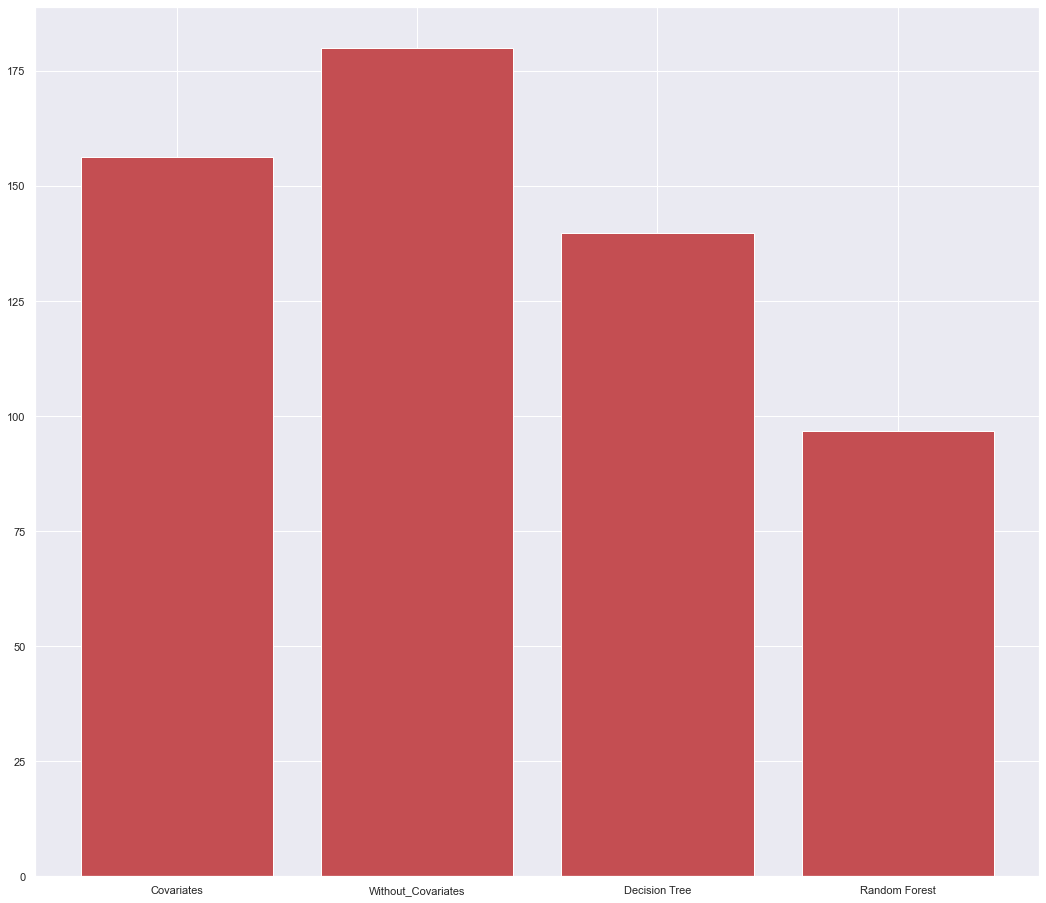

In [155]:
import matplotlib as mpl
import matplotlib.pyplot as plt
y_axis=[156.18,179.94,139.80,96.81]
x_axis=[1,2,3,4]
plt.bar(x_axis, y_axis, color='r', tick_label=['Covariates','Without_Covariates','Decision Tree','Random Forest'])

# Conclusion

In conclusion, we have built regression model based on machine learning methods for house price prediction. The data we collected from the dataset had been divided into two groups, train group and test group, in order to assess the performance of our model. The machine learning algorithms we implemented in this article is **Linear Regression Model**, **Decision Tree Model** and **Random Forest Model**. It is from the **Linear Regression Model** we tested that **SQUARE_FT** and **BHK_NO.**, which stands for total area of the house and number of rooms, should be controlled for as covariates. Lastly, we assessed the performance of each individual models based on the RMSE, and observe that the **Random Forest Model** is the one with the highest performance level with the lowest RMSE.

In this project, we had only successfully implemented three models to predict the house price, more algorithms can be also utilized with the aim of predicting house price, such as **Lasso Regression Model** or **Ridge Regression Model**, and might give us different outcomes.

Besides, the performance of each individual model can also be improved in future works if we have more observations, which can help us increase the accuracy of the prediction. Meanwhile, if we have more features of those houses in the dataset that should have been controlled for that affects the house price, the predictive power of the models might be higher.

# Reference

[1] Adetunji, A. B., Akande, O. N., Ajala, F. A., Oyewo, O., Akande, Y. F., &amp; Oluwadara, G. (2022, February 3). House price prediction using Random Forest Machine Learning Technique. Procedia Computer Science. Retrieved May 6, 2022, from https://www.sciencedirect.com/science/article/pii/S1877050922001016?ref=pdf_download&amp;fr=RR-2 

[2] House price prediction modeling using machine learning. (n.d.). Retrieved May 6, 2022, from https://j.mecs-press.net/ijieeb/ijieeb-v12-n2/IJIEEB-V12-N2-3.pdf 

[3] Kaushal, A., &amp; Shankar, A. (2021, April 27). House price prediction using multiple linear regression. SSRN. Retrieved May 6, 2022, from https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3833734 